In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset to take a look at the first few rows and understand its structure
df = pd.read_csv('/Users/bryanbenisti/Desktop/Jupyter_Notebook/Data_course/Final Assignment /barcelona_listings.csv', encoding='utf-8')
df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,neighborhood_overview,notes,transit,access,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18666,https://www.airbnb.com/rooms/18666,2.020000e+13,10/07/2019,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Apartment in Barcelona near to the Plaza de la...,NaN,"Good transports connections, 50 m from the met...",Free Wifi - air conditioning. We will provide ...,...,False,False,flexible,False,False,31,31,0,0,0.02
1,18674,https://www.airbnb.com/rooms/18674,2.020000e+13,10/07/2019,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,NaN,"Good transport connection, 150 m from metro �...",Free Wifi - air conditioning. We will provide ...,...,True,False,strict_14_with_grace_period,False,False,31,31,0,0,0.20
2,21605,https://www.airbnb.com/rooms/21605,2.020000e+13,10/07/2019,Nice and sunny duble room,"The flat is in Poblenou district, and the room...",Poblenou as one of the few areas that has grow...,"Tingues en compte que vivim amb gats, assegura...","By metro, tram, bus, taxi, bicycle. See more i...",The kitchen is fully equipped and can use the ...,...,False,False,moderate,False,False,2,0,2,0,3.08
3,23197,https://www.airbnb.com/rooms/23197,2.020000e+13,10/07/2019,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,I do not accept groups of young people under 2...,Strategically located in the area of Parc del ...,I do not accept groups of young people under 2...,Tram stop Line T4 Campus Diagonal- Besos just...,You book the entire apartment for yourselves.,...,True,False,strict_14_with_grace_period,False,True,2,2,0,0,0.44
4,25786,https://www.airbnb.com/rooms/25786,2.020000e+13,10/07/2019,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,Solo decir que a menudo ni salgo del barrio. M...,No dudes en perdir una cita para un masaje rel...,Metro con las principales estaciones. A pie. E...,All access with respect. Kitchen facilities ne...,...,True,False,strict_14_with_grace_period,True,True,1,0,1,0,2.22


In [3]:
# Selecting columns that are potentially useful for our analysis
selected_columns = [
    'id','amenities', 'neighbourhood', 'latitude', 'longitude', 
    'room_type', 'accommodates', 'bedrooms', 'beds', 
    'price', 'minimum_nights', 'number_of_reviews', 
    'review_scores_rating', 'availability_365', 
    'calculated_host_listings_count', 'reviews_per_month'
]

# Creating a new dataframe with the selected columns
df_selected = df[selected_columns].copy()

# Checking if there are any columns that could be problematic or need transformation
# For instance, the 'price' column might be in a string format with a currency symbol that needs to be converted to float.
# Let's also check for missing values in these columns to decide if any imputation is necessary.

# Checking data types and missing values
df_info = pd.DataFrame({'Data Type': df_selected.dtypes, 'Missing Values': df_selected.isnull().sum()})

df_info


,Data Type,Missing Values
id,int64,0
amenities,object,0
neighbourhood,object,6
latitude,float64,0
longitude,float64,0
room_type,object,0
accommodates,int64,0
bedrooms,float64,1
beds,float64,5
price,int64,0


In [4]:
df_selected['price'].describe()

count    5999.000000
mean      136.983997
std       428.905828
min         9.000000
25%        40.000000
50%        73.000000
75%       125.000000
max      9120.000000
Name: price, dtype: float64

In [5]:
# Data Cleaning: Imputing missing values
df_selected['bedrooms'].fillna(df_selected['bedrooms'].median(), inplace=True)
df_selected['beds'].fillna(df_selected['beds'].median(), inplace=True)

# Considering 'review_scores_rating' and 'reviews_per_month', imputing with 0 might indicate no reviews or ratings,
# which could be informative in itself. Thus, we'll impute missing values with 0 for these columns.
df_selected['review_scores_rating'].fillna(0, inplace=True)
df_selected['reviews_per_month'].fillna(0, inplace=True)

# Feature Engineering: Creating Additional Columns
# Example: Binary feature for high availability (more than 180 days available in a year)
df_selected['high_availability'] = df_selected['availability_365'] > 180

# Example: Categorizing properties based on the number of accommodates into 'small', 'medium', 'large'
bins = [0, 2, 4, 10]
labels = ['small', 'medium', 'large']
df_selected['size_category'] = pd.cut(df_selected['accommodates'], bins=bins, labels=labels, right=False)


# Step 1: Strip the enclosing characters (if any) and split by commas
df['amenities_count'] = df['amenities'].str.strip("{}").str.split(",").apply(len)
df_selected['neighbourhood'] = df_selected['neighbourhood'].str.replace('�', '')

# Now, 'amenities_count' contains the count of amenities per listing


df_selected.head()


,id,amenities,neighbourhood,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,availability_365,calculated_host_listings_count,reviews_per_month,high_availability,size_category
0,18666,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",Sant Mart,41.40889,2.18555,Entire home/apt,6,2.0,4.0,130,3,1,80.0,182,31,0.02,True,large
1,18674,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",La Sagrada Fam,41.40420,2.17306,Entire home/apt,8,3.0,6.0,60,1,15,87.0,129,31,0.20,False,large
2,21605,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",Sant Mart,41.40560,2.19821,Private room,2,1.0,1.0,33,2,119,90.0,15,2,3.08,False,medium
3,23197,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",Sant Mart,41.41203,2.22114,Entire home/apt,6,3.0,8.0,210,3,45,95.0,318,2,0.44,True,large
4,25786,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",Vila de Gr,41.40145,2.15645,Private room,2,1.0,1.0,45,1,241,95.0,115,1,2.22,False,medium


In [6]:
# Adding necessary categorical columns to our dataframe
additional_categorical_columns = ['property_type', 'cancellation_policy', 'instant_bookable']

# Adding these columns from the original dataset to our selected dataframe
for column in additional_categorical_columns:
    df_selected[column] = df[column]

# Considering the 'amenities' column, we'll first take a look at its structure in the original dataset to decide on the approach
df['amenities'].head()


0    {TV,Internet,Wifi,"Air conditioning","Wheelcha...
1    {TV,Internet,Wifi,"Air conditioning","Wheelcha...
2    {TV,Wifi,Kitchen,"Paid parking off premises",E...
3    {TV,Internet,Wifi,"Wheelchair accessible",Kitc...
4    {TV,Wifi,"Air conditioning",Kitchen,"Smoking a...
Name: amenities, dtype: object

In [7]:
# Counting the number of amenities per listing and adding it as a new column
df_selected['amenities_count'] = df['amenities'].apply(lambda x: len(x.strip("{}").split(",")))
df_selected['neighbourhood'] = df_selected['neighbourhood'].str.replace('�', '')


df_selected.head()


,id,amenities,neighbourhood,latitude,longitude,room_type,accommodates,bedrooms,beds,price,...,review_scores_rating,availability_365,calculated_host_listings_count,reviews_per_month,high_availability,size_category,property_type,cancellation_policy,instant_bookable,amenities_count
0,18666,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",Sant Mart,41.40889,2.18555,Entire home/apt,6,2.0,4.0,130,...,80.0,182,31,0.02,True,large,Apartment,flexible,False,18
1,18674,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",La Sagrada Fam,41.40420,2.17306,Entire home/apt,8,3.0,6.0,60,...,87.0,129,31,0.20,False,large,Apartment,strict_14_with_grace_period,True,22
2,21605,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",Sant Mart,41.40560,2.19821,Private room,2,1.0,1.0,33,...,90.0,15,2,3.08,False,medium,Apartment,moderate,False,41
3,23197,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",Sant Mart,41.41203,2.22114,Entire home/apt,6,3.0,8.0,210,...,95.0,318,2,0.44,True,large,Apartment,strict_14_with_grace_period,True,46
4,25786,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",Vila de Gr,41.40145,2.15645,Private room,2,1.0,1.0,45,...,95.0,115,1,2.22,False,medium,Apartment,strict_14_with_grace_period,True,17


In [8]:
# Check the unique values in the 'cancellation_policy' column
print(df['cancellation_policy'].unique())

# Define a function to clean the 'cancellation_policy' values
def clean_cancellation_policy(policy):
    if 'strict' in policy:
        return 'Strict'
    elif 'moderate' in policy:
        return 'Moderate'
    elif 'flexible' in policy:
        return 'Flexible'
    else:
        return 'Other'

# Apply the cleaning function to the 'cancellation_policy' column
df_selected['cancellation_policy'] = df_selected['cancellation_policy'].apply(clean_cancellation_policy)

# Verify the changes
print(df_selected['cancellation_policy'].unique())


['flexible' 'strict_14_with_grace_period' 'moderate' 'super_strict_60'
 'super_strict_30' 'strict']
['Flexible' 'Strict' 'Moderate']


# General Overview

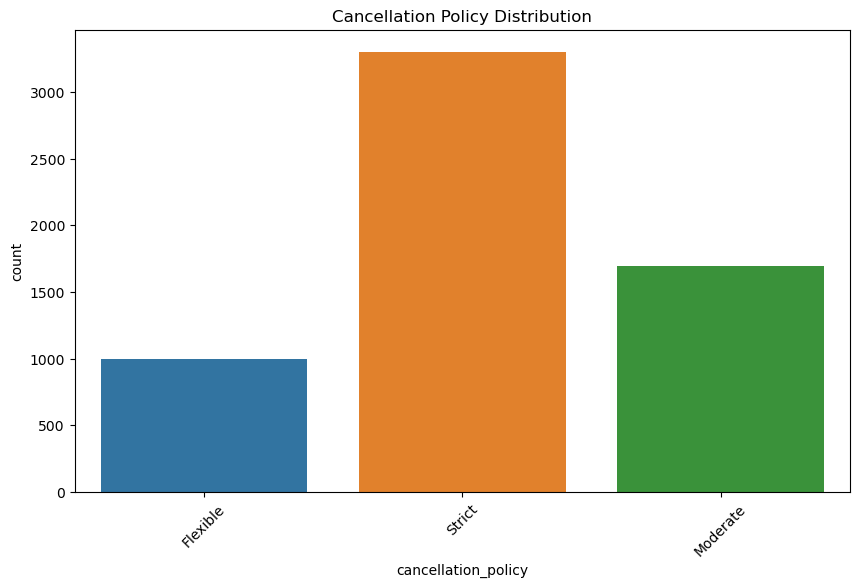

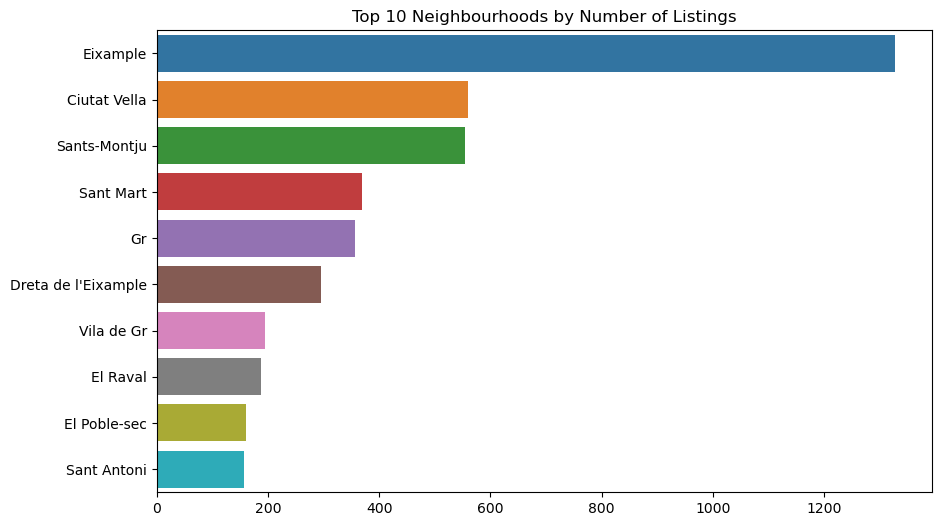

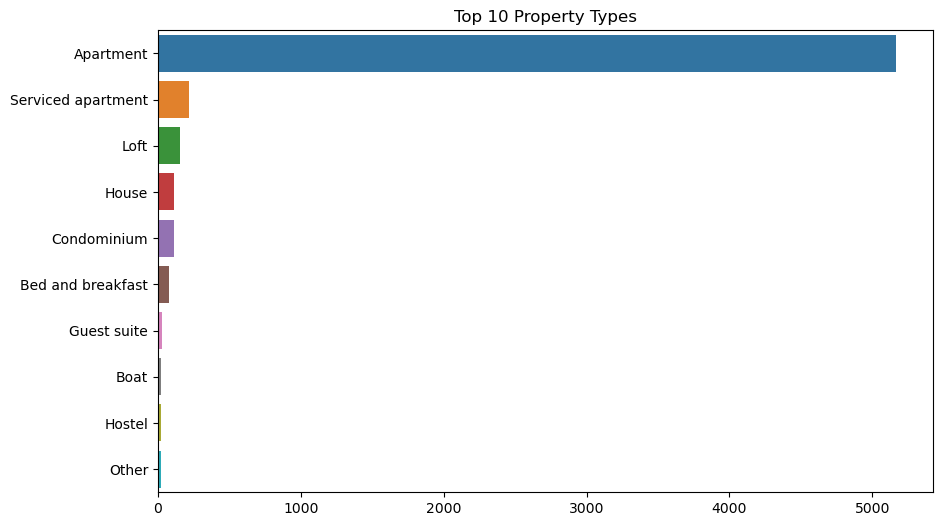

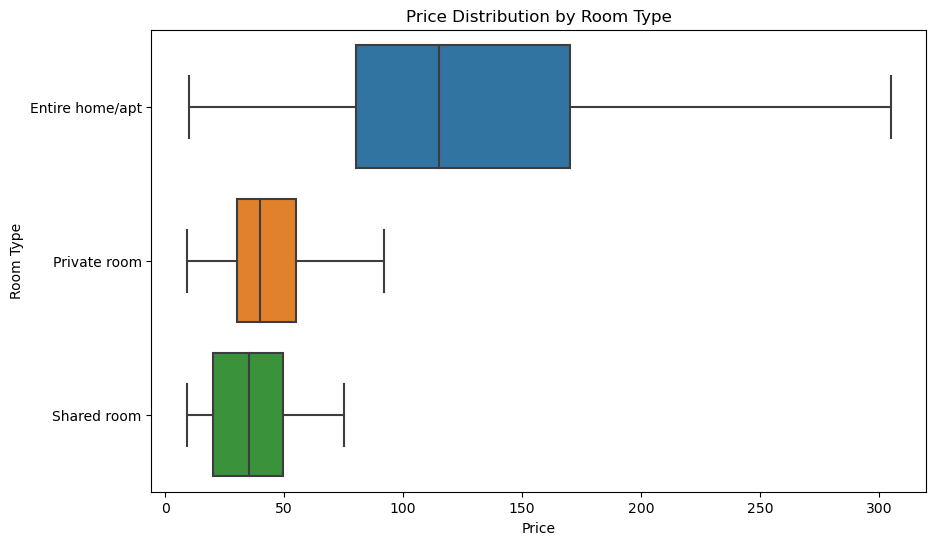

In [9]:
# Visualization 1: Cancellation Policy Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cancellation_policy', data=df_selected)
plt.title('Cancellation Policy Distribution')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Top 10 Neighbourhoods by Number of Listings
df_selected['neighbourhood'] = df_selected['neighbourhood'].str.replace('�', '')
plt.figure(figsize=(10, 6))
top_neighbourhoods = df_selected['neighbourhood'].value_counts().head(10)
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index)
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.show()

# Visualization 3: Top 10 Property Types
plt.figure(figsize=(10, 6))
top_property_types = df_selected['property_type'].value_counts().head(10)
sns.barplot(x=top_property_types.values, y=top_property_types.index)
plt.title('Top 10 Property Types')
plt.show()

# Visualization: Price distribution for each room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', y='room_type', data=df_selected, showfliers = False)
plt.title('Price Distribution by Room Type')
plt.xlabel('Price')
plt.ylabel('Room Type')
plt.show()


Neighbourhood Listings: Eixample is the neighbourhood with the highest number of listings, significantly outpacing others and indicating it as a popular choice for Airbnb hosts in Barcelona.

Property Type Distribution: Apartments dominate the property type listings on Airbnb, making up the vast majority, followed by a smaller but notable number of serviced apartments and lofts.

Price Distribution by Room Type: Entire homes/apartments show the highest price range and median price compared to private and shared rooms, which have a more modest price distribution, suggesting that guests pay premium prices for privacy and space.

# INSIGHTS 1 : Relationship Between Property Type, Amenities, and Pricing

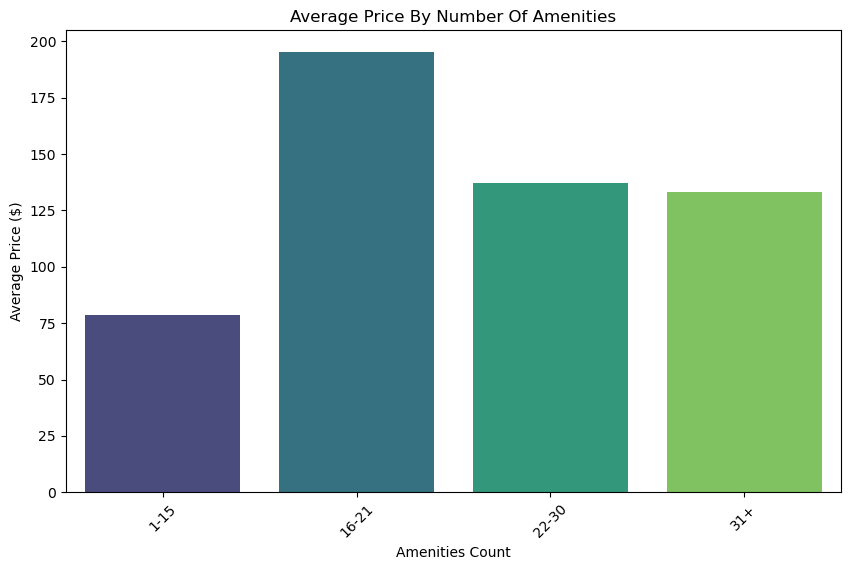

In [10]:
# Define custom bins for the 'amenities_count' column
bins = [1, 15, 21, 30, df_selected['amenities_count'].max()]
labels = ['1-15', '16-21', '22-30', '31+']

# Categorize listings based on the number of amenities they offer
df_selected['amenities_count'] = pd.cut(df_selected['amenities_count'], bins=bins, labels=labels, right=False)

# Calculating average price for each amenities category
average_price_by_amenities = df_selected.groupby('amenities_count')['price'].mean().reset_index()

# Visualizing the impact of amenities on listing prices
plt.figure(figsize=(10, 6))
sns.barplot(x='amenities_count', y='price', data=average_price_by_amenities, palette='viridis')
plt.title('Average Price By Number Of Amenities')
plt.ylabel('Average Price ($)')
plt.xlabel('Amenities Count')
# Setting the x-axis labels to be the bins we've created
plt.xticks(rotation=45)
plt.show()

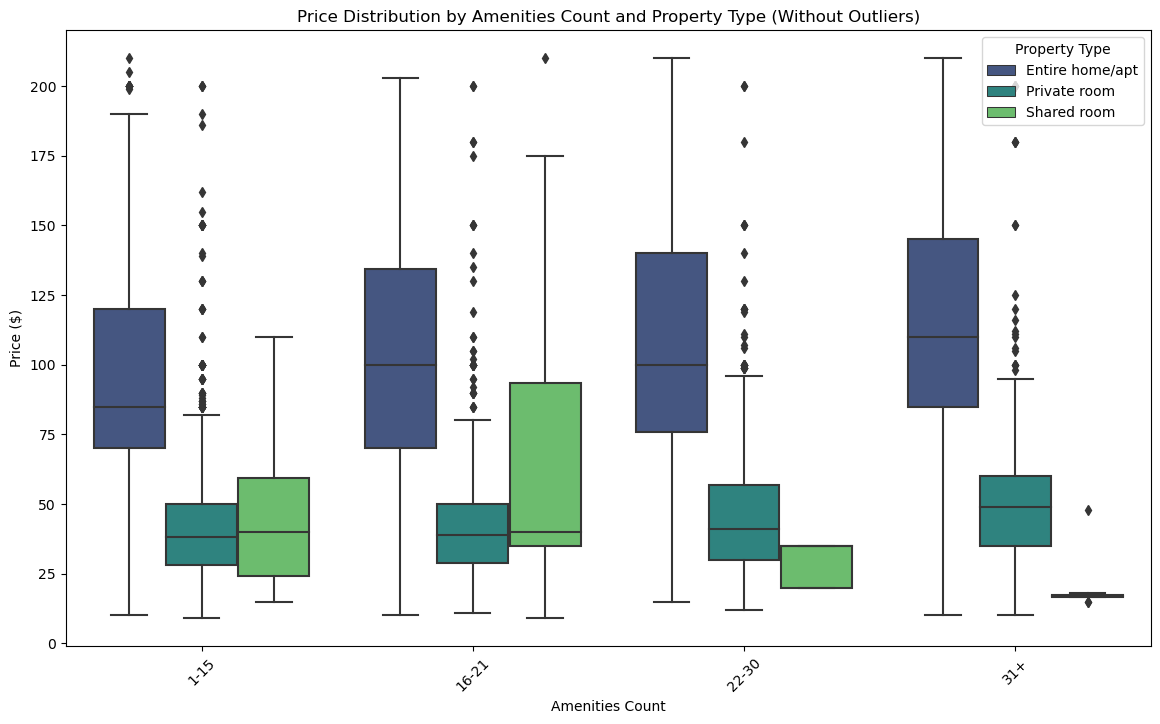

In [11]:
# Assuming df_selected already has the 'amenities_count' column

# Define a function to remove outliers based on the price column
def remove_outliers(df, column='price'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -  IQR
    upper_bound = Q3 + IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Your outlier removal function remains the same...

# Apply the function to remove outliers
df_no_outliers = remove_outliers(df_selected)

# Create a boxplot without outliers using the 'viridis' palette for consistency
plt.figure(figsize=(14, 8))
sns.boxplot(x='amenities_count', y='price', hue='room_type', data=df_no_outliers, palette='viridis')
plt.title('Price Distribution by Amenities Count and Property Type (Without Outliers)')
plt.ylabel('Price ($)')
plt.xlabel('Amenities Count')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.show()



Optimal Range for Amenities: The data indicates that listings with 16-21 amenities command the highest average price, challenging the notion that more amenities always lead to higher prices.

Distinct Impact by Room Type: For entire homes/apartments, there is a positive correlation between the number of amenities and the listing price, suggesting that guests are willing to pay more for added features.

Stable Pricing for Private Rooms: Private rooms show a relatively stable price regardless of the number of amenities, indicating that other factors may be more influential on price for these listings.

Decreased Value for Shared Rooms with More Amenities: Interestingly, shared rooms exhibit a decrease in price as the number of amenities increases, which may reflect market preferences or an overvaluation of additional amenities in these shared spaces.

# Insight 3 IMPACT OF DISTANCE FROM THE BEACH VS. CITY ON PRICE

In [12]:
pip install pandas geopy


Note: you may need to restart the kernel to use updated packages.


In [13]:
from geopy.distance import geodesic


# Define the central point (example: Barcelona city center)
central_point = (41.3851, 2.1734)  # Latitude and Longitude of Barcelona City Center

# Function to calculate distance to the central point
def calculate_distance(row, central_point):
    listing_location = (row['latitude'], row['longitude'])
    return geodesic(listing_location, central_point).kilometers

# Apply the function to each row in the DataFrame
df_selected['distance_to_central'] = df.apply(calculate_distance, central_point=central_point, axis=1)

# Analyze the average price by distance segments
# Example segmentation: 0-1 km, 1-3 km, 3-5 km, >5 km from the central point
bins = [0, 1, 3, 5, float('inf')]
labels = ['0-1 km', '1-3 km', '3-5 km', '>5 km']
df_selected['distance_category'] = pd.cut(df_selected['distance_to_central'], bins=bins, labels=labels)

# Calculate average price for each distance category
average_price_by_distance = df_selected.groupby('distance_category')['price'].mean()

# Visualize the results (This step would be done separately using your preferred visualization library, e.g., matplotlib or seaborn)
print(average_price_by_distance)


distance_category
0-1 km    111.853976
1-3 km    155.197409
3-5 km    115.617126
>5 km      55.556452
Name: price, dtype: float64


In [14]:
# Define the central point (example: Barcelona beach area)
Beach_area = (41.378, 2.192)  # Latitude and Longitude of Barcelona beach area

# Function to calculate distance to the central point
def calculate_distance(row, Beach_area):
    listing_location = (row['latitude'], row['longitude'])
    return geodesic(listing_location, Beach_area).kilometers

# Apply the function to each row in the DataFrame
df_selected['distance_to_beach'] = df.apply(calculate_distance, Beach_area=Beach_area, axis=1)

# Analyze the average price by distance segments
# Example segmentation: 0-1 km, 1-3 km, 3-5 km, >5 km from the beach area
bins = [0, 1, 3, 5, float('inf')]
labels = ['0-1 km', '1-3 km', '3-5 km', '>5 km']
df_selected['distance_category'] = pd.cut(df_selected['distance_to_beach'], bins=bins, labels=labels)

# Calculate average price for each distance category
average_price_by_distance = df_selected.groupby('distance_category')['price'].mean()

# Visualize the results (This step would be done separately using your preferred visualization library, e.g., matplotlib or seaborn)
print(average_price_by_distance)

distance_category
0-1 km     88.398374
1-3 km    134.836077
3-5 km    153.671146
>5 km      75.659878
Name: price, dtype: float64


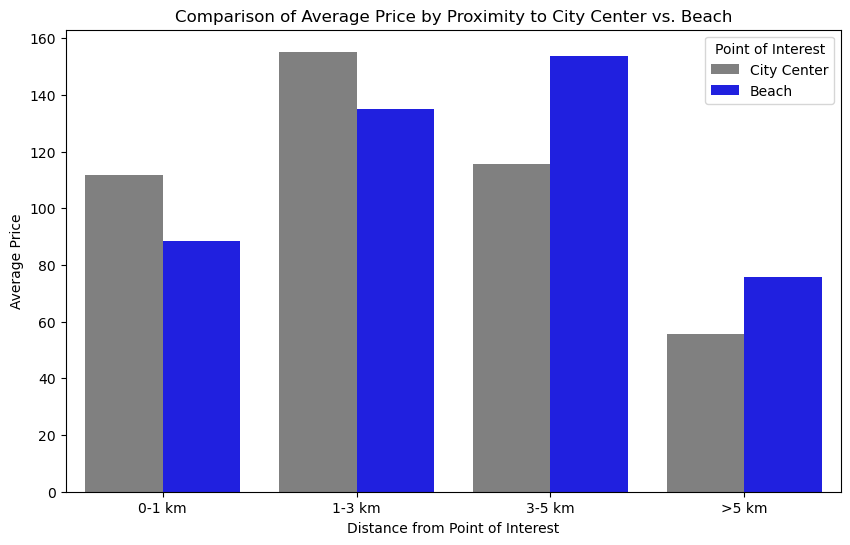

In [15]:
data = {
    'Distance from Point of Interest': ['0-1 km', '1-3 km', '3-5 km', '>5 km'] * 2,
    'Average Price': [111.85, 155.20, 115.62, 55.56, 88.40, 134.84, 153.67, 75.66],
    'Point of Interest': ['City Center', 'City Center', 'City Center', 'City Center',
                          'Beach', 'Beach', 'Beach', 'Beach']
}
df_comparison = pd.DataFrame(data)

# Plotting the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Distance from Point of Interest', y='Average Price', hue='Point of Interest', data=df_comparison, palette={'Beach': 'blue', 'City Center': 'gray'})
plt.title('Comparison of Average Price by Proximity to City Center vs. Beach')
plt.xlabel('Distance from Point of Interest')
plt.ylabel('Average Price')
plt.show()


City Center Proximity Premium: Listings 1-3 km from Barcelona's city center command higher prices, indicating a value placed on being close to central attractions with the advantage of a less crowded area.

Beach Proximity Pricing: The highest average prices for proximity to the beach are at 3-5 km, challenging the expectation that closer beach access always equates to higher listing prices.

Price Drop Beyond 5 km: There is a significant decrease in listing prices beyond 5 km from both the city center and the beach, reflecting lower demand for accommodations farther from key attractions.

Balanced Location Value: Guests appear to prefer locations that offer a balance between access to the beach and the city center, suggesting the importance of a diverse experience over proximity to a single attraction in Barcelona.

# INSIGHT 4 : COMPARAISON OF NEIGHBOURHOODS BY AVERAGE PRICE AND AVERAGGE DISTANCE

In [16]:

# Calculate the average price for each neighbourhood group
avg_price_by_neighbourhood = df_selected.groupby('neighbourhood')['price'].mean()

# Get the top 3 most expensive neighbourhood groups
top_3_neighbourhood_groups = avg_price_by_neighbourhood.sort_values(ascending=False).head(3)

# Assuming you have the latitude and longitude for each neighbourhood in your dataset
# and the coordinates for the city center and beach, you can calculate the average distance as follows:

# Define the central point (city center) and beach coordinates
city_center_coords = (41.3851, 2.1734)  # Example coordinates for Barcelona city center
beach_coords = (41.3780, 2.1920)  # Example coordinates for Barceloneta Beach

# Calculate the average distance to the city center and beach for each of the top 3 neighbourhood groups
def calculate_distances(df, coords, neighbourhood_groups):
    distances = []
    for neighbourhood in neighbourhood_groups.index:
        # Filter the dataframe for each neighbourhood group
        df_neighbourhood = df[df['neighbourhood'] == neighbourhood]
        # Calculate the distance for each listing in the neighbourhood group and take the average
        avg_distance_center = df_neighbourhood.apply(
            lambda row: geodesic((row['latitude'], row['longitude']), coords).kilometers, axis=1
        ).mean()
        distances.append(avg_distance_center)
    return distances

# Calculate average distances to the city center and beach
avg_distances_to_center = calculate_distances(df_selected, city_center_coords, top_3_neighbourhood_groups)
avg_distances_to_beach = calculate_distances(df_selected, beach_coords, top_3_neighbourhood_groups)

# Create a dataframe to display the results
top_3_neighbourhood_distances = pd.DataFrame({
    'Neighbourhood Group': top_3_neighbourhood_groups.index,
    'Average Price': top_3_neighbourhood_groups.values,
    'Average Distance to City Center (km)': avg_distances_to_center,
    'Average Distance to Beach (km)': avg_distances_to_beach
})

top_3_neighbourhood_distances


,Neighbourhood Group,Average Price,Average Distance to City Center (km),Average Distance to Beach (km)
0,Dreta de l'Eixample,370.271186,1.087489,2.615917
1,La Font d'en Fargues,272.000000,4.639785,5.822693
2,La Vila Ol,239.763636,1.995360,1.445082


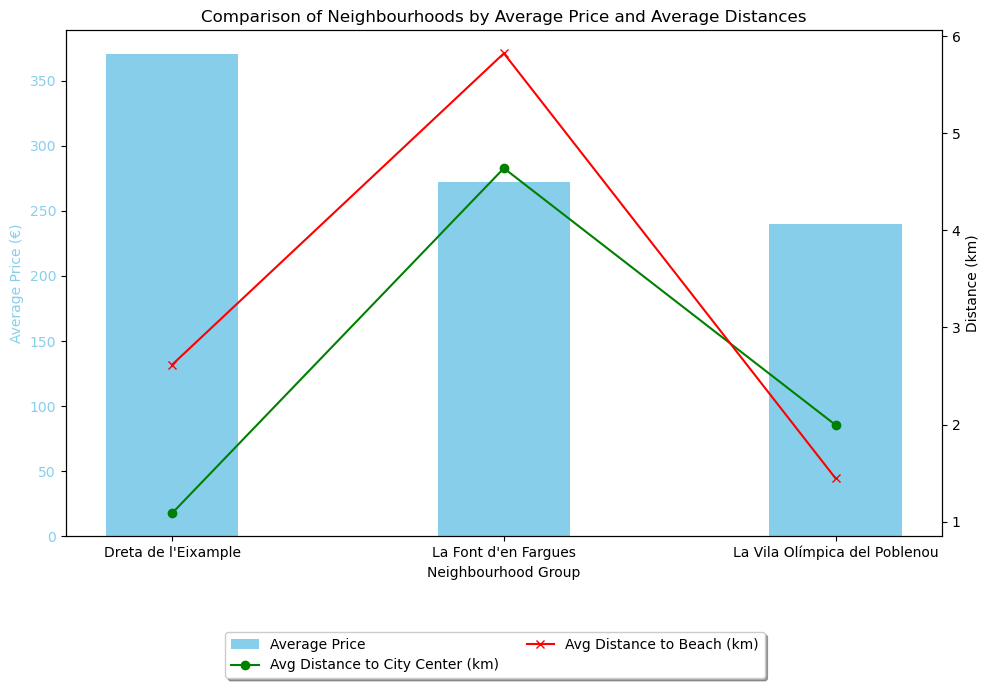

In [17]:


# Creating a DataFrame from the provided data
data = {
    'Neighbourhood Group': ['Dreta de l\'Eixample', 'La Font d\'en Fargues', 'La Vila Olímpica del Poblenou'],
    'Average Price': [370.271186, 272.000000, 239.763636],
    'Average Distance to City Center (km)': [1.087489, 4.639785, 1.995360],
    'Average Distance to Beach (km)': [2.615917, 5.822693, 1.445082]
}

df = pd.DataFrame(data)

# Setting the index to 'Neighbourhood Group' for better plotting
df.set_index('Neighbourhood Group', inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Average Price
ax1.bar(df.index, df['Average Price'], color='skyblue', label='Average Price', width=0.4)
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Average Price (€)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Line chart for distances
ax2.plot(df.index, df['Average Distance to City Center (km)'], color='green', marker='o', label='Avg Distance to City Center (km)')
ax2.plot(df.index, df['Average Distance to Beach (km)'], color='red', marker='x', label='Avg Distance to Beach (km)')
ax2.set_ylabel('Distance (km)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adding legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.title('Comparison of Neighbourhoods by Average Price and Average Distances')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


City Center Proximity: Dreta de l'Eixample is closest to the city center (1.09 km), influencing its high price.

Beach Access: La Vila Olímpica, closest to the beach (1.45 km), ranks third in price, showing the value of beach proximity.

Distance Impact: Despite La Font d'en Fargues being farthest from city center and beach (>4.6 km), it still commands a high price, showcasing varied distance impacts.

Top Expensive Neighbourhoods: Dreta de l'Eixample, La Font d'en Fargues, and La Vila Olímpica lead with average prices of €370, €272, and €240.

# INSIGHT 5 : he Value of Reputation: Analyzing Price Correlations with Review Volume and Scores

In [18]:
# Assuming df_selected is your DataFrame
Q1 = df_selected['price'].quantile(0.25)
Q3 = df_selected['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df_selected[(df_selected['price'] >= lower_bound) & (df_selected['price'] <= upper_bound)]

# Now df_filtered will not contain outliers based on the 'price' column


/var/folders/4m/f95t0y2d3_3900_jgscm33980000gn/T/ipykernel_98195/1441944443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['review_count_category'] = pd.cut(df_filtered['number_of_reviews'], bins=review_bins, labels=review_labels)
/var/folders/4m/f95t0y2d3_3900_jgscm33980000gn/T/ipykernel_98195/1441944443.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['review_score_bracket'] = pd.cut(df_filtered['review_scores_rating'], bins=score_bins, labels=score_labels)


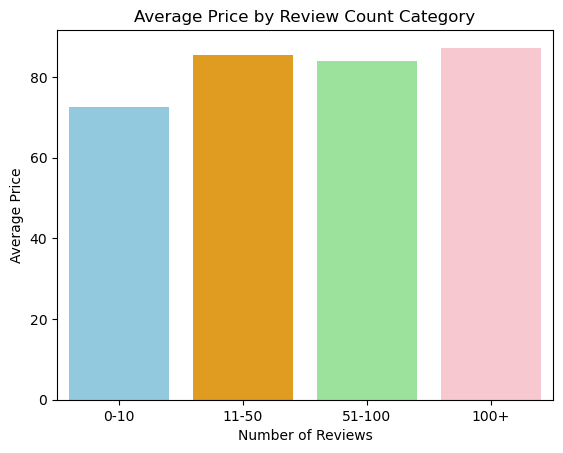

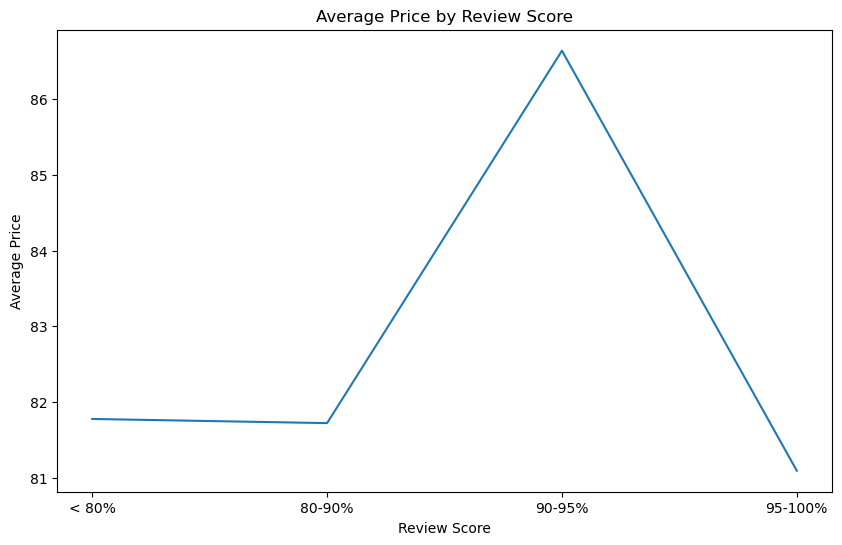

In [19]:
# Categorize the number of reviews into bins
review_bins = [0, 10, 50, 100, np.inf]
review_labels = ['0-10', '11-50', '51-100', '100+']
df_filtered['review_count_category'] = pd.cut(df_filtered['number_of_reviews'], bins=review_bins, labels=review_labels)

# Categorize review scores into brackets
score_bins = [0, 80, 90, 95, 100]
score_labels = ['< 80%', '80-90%', '90-95%', '95-100%']
df_filtered['review_score_bracket'] = pd.cut(df_filtered['review_scores_rating'], bins=score_bins, labels=score_labels)

# Calculate average prices for each review count category and review score bracket
average_price_by_review_count = df_filtered.groupby('review_count_category')['price'].mean()
average_price_by_review_score = df_filtered.groupby('review_score_bracket')['price'].mean()

# Visualization 1: Bar Plot for Average Price by Review Count Category
sns.barplot(x=average_price_by_review_count.index, y=average_price_by_review_count.values,
            palette=['skyblue', 'orange', 'lightgreen', 'pink', 'violet'])  # Custom colors
plt.title('Average Price by Review Count Category')
plt.ylabel('Average Price')
plt.xlabel('Number of Reviews')
plt.show()

# Visualization 2: Line Graph for Average Price by Review Score Bracket
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_price_by_review_score.index, y=average_price_by_review_score.values)
plt.title('Average Price by Review Score')
plt.ylabel('Average Price')
plt.xlabel('Review Score')
plt.show()

- Listings with over 100 reviews demand the highest average price of $85, underscoring the correlation between a large number of reviews and pricing power.
- Review scores between 95-100% lead to the highest pricing tier at an average of $86, affirming that guests are willing to pay a premium for top-rated accommodations.
- Surprisingly, listings with review scores below 80% also exhibit a high average price of $82, suggesting factors beyond guest feedback—like location or unique features—may justify higher rates.
- The overall trend shows that both a higher quantity and quality of reviews positively impact listing prices, with the most significant premiums associated with high review scores and a substantial number of reviews.

# Insight 2 : IMPACT OF THE  PREMIUM AMENITIES ON THE PRICE

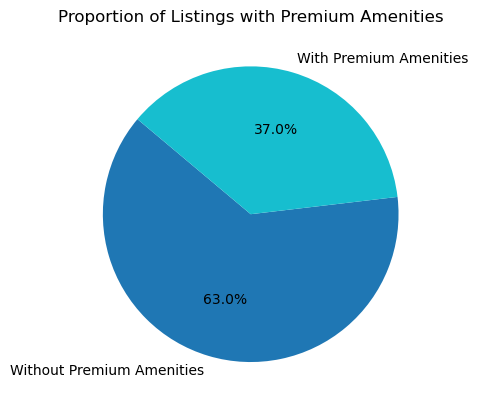

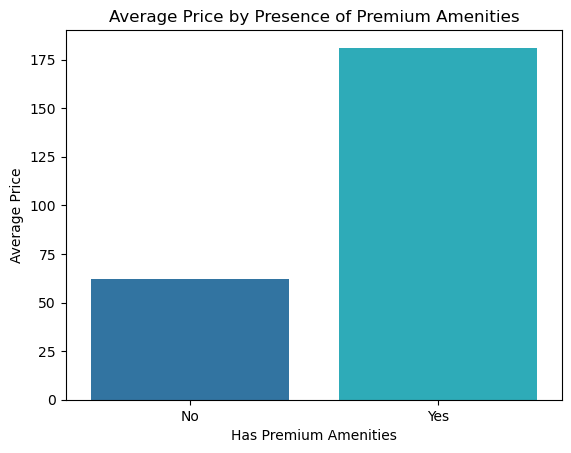

In [20]:
# Assuming 'amenities' column exists and 'df_selected' is your DataFrame
# Define premium amenities
premium_amenities = ['Pool', 'Hot Tub', 'Free parking on premises', 'Air conditioning', 'Gym', 'Waterfront']

# Check if each listing has premium amenities
df_selected['has_premium'] = df_selected['amenities'].apply(
    lambda amns: any(premium in amns for premium in premium_amenities)
)

# Calculate the proportions for the pie chart
proportions = df_selected['has_premium'].value_counts(normalize=True)

# Create a pie chart with blue/green tones
plt.pie(proportions, labels=['Without Premium Amenities', 'With Premium Amenities'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#17becf'])
plt.title('Proportion of Listings with Premium Amenities')
plt.show()

# Calculate average prices for the bar plot
avg_prices = df_selected.groupby('has_premium')['price'].mean().reset_index()

# Create a bar plot with blue/green tones
sns.barplot(x='has_premium', y='price', data=avg_prices, palette=['#1f77b4', '#17becf'])
plt.title('Average Price by Presence of Premium Amenities')
plt.xlabel('Has Premium Amenities')
plt.ylabel('Average Price')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


Premium amenities:  pools, hot tubs, free parking, air conditioning, gyms, and waterfront access.

Selective Presence: A smaller portion of properties (37%) in the dataset feature premium amenities, which indicates a level of exclusivity in the market.

Significant Price Influence: Despite their lesser prevalence, listings with premium amenities demonstrate a significant increase in average price, highlighting the substantial impact that these amenities have on the pricing strategy.